# TP Analyse scenarios IMACLIM-R - 26/10/23

Pré-requis: 
- un environnement python avec les modules demandés installés, la possibilité de travailler avec des notebook (par exemple Jupyter Lab https://jupyterlab.readthedocs.io/en/stable/getting_started/installation.html, conseil : https://github.com/lckr/jupyterlab-variableInspector pour visualiser les variables)
- le dossier data (qui contient les données) dans le répertoire de travail


Vous allez analyser des résultats de scénarios issus du modèle Imaclim-R monde (https://www.iamcdocumentation.eu/Model_Documentation_-_IMACLIM.)


Le document « ensemble scenarios ImaclimR.pdf » décrit comment un ensemble de scénarios de « baseline », i.e. sans politique climatique, a été obtenu. La base de données de scénarios est enrichie de scénarios « d’atténuation », i.e. avec un objectif de réduction des émissions de gaz à effet de serre ; un scénario d’atténuation par baseline.
Les résultats correspondants à l’ensemble de ces scénarios en termes d’émissions de $CO_2$ (ECO2_w.csv), de PIB (GDP_w.csv) et de PIB par habitant (GDPcap_w.csv), d’intensité énergétique du PIB (EI_w.csv) et d’intensité carbone de l’énergie (CI_w.csv), à l’échelle mondiale sur la période 2015-2065, sont fournis dans le dossier /data.

Ce dossier contient également les trajectoires de population mondiale, exogène, de l’ensemble des scénarios (Pop_w.csv). Tous les résultats sont donnés en indice par rapport à la valeur 2015. La première ligne donne les années dans les fichiers de résultats. Chaque ligne suivante correspond à un scenario de la base de données de scénarios. Par ailleurs, le dossier contient également un fichier drivers.csv qui donne la combinaison des groupes de paramètres correspondant à chaque scénario (voir le fichier readme.txt pour une explication des indices du fichier drivers.csv). Dans tous les fichiers csv les scénarios sont classés dans le même ordre. 


Commencez par lire les différents documents, et par ouvrir les fichiers csv pour comprendre comment les données sont organisées.


Vous allez créer et utiliser un code python3 pour lire les données de résultats, et les analyser en traçant un certain nombre de graphiques. Le rendu du TP sera à la fois le code lui-même, et ce fichier dans lequel vous aurez copié vos graphiques et rédigé vos analyses. Vous êtes cependant libre sur le format final du rendu (codé commenté + document word/pdf, notebook...).


In [1]:

import csv
import os #lecture ecriture de csv; os management
import numpy as np #traitement de matrice de type numpy array
import matplotlib.pyplot as plt #librairy graphique
#ANOVA: fin du TD (optionnel)
from pandas import DataFrame,read_csv,concat,notnull
import glob
import pandas as pd
from statsmodels.stats.anova import anova_lm
from statsmodels.formula.api import ols
from scipy.stats import linregress


# **A. Baselise analysis**

Description des variables (en base 1 de 2015)

|  Name |   Description  |
|---|---|
| eco2  | $CO_2$ emissions  |
|  pop | World population   |
|  gdp_per_cap | GDP per capita  |
| gdp  | GDP |
| ei  | Energy intensity of GDP|
| ci | Carbon intensity of energy |

In [2]:
# #Reading data

# path_data='data/'

# # plusieurs manière d'importer les données, choisissez :s

# #starts at line 1 instead of zero because the line zero contains dates
# eco2 = np.array([line for line in csv.reader(open(path_data+'ECO2_w.csv','r'))][1:],dtype=float)#global CO2 emissions
# eco2 = np.genfromtxt( path_data+'ECO2_w.csv', dtype=None, delimiter=',', skip_header=1)
# eco2 = pd.read_csv( path_data+'ECO2_w.csv', delimiter=',').to_numpy()

# pop= np.array([line for line in csv.reader(open(path_data+'Pop_w.csv','r'))][1:],dtype=float)#world population

# # import other variables 
# # gdp_per_cap, gdp, ei, ci



In [3]:
# With python dictonnaries
path_data='data/' # 'data/'
data_tp = {}
for fil in [fil for fil in os.listdir(path_data) if '.csv' in fil]: #os.listdir(path_data) renvoie tous les fichiers dans path_data et on ne garde que les .csv
    data_tp[ fil.replace('.csv', '')] = np.array([line for line in csv.reader(open( path_data+fil,'r'))][1:],dtype=float)

eco2 = np.array([line for line in csv.reader(open(path_data+'ECO2_w.csv','r'))][1:],dtype=float) #global CO2 emissions

In [4]:
# Loading years and the drivers' names
# # over 2015-2100 years
years = np.array([line for line in csv.reader(open('data/Pop_w.csv','r'))][0],dtype=float) #line zero zero

#avec pandas
#years = pd.read_csv( path_data+'ECO2_w.csv', delimiter=',').columns.to_numpy()

# drivers of the scenarios
drivers= np.array([line for line in csv.reader(open('data/drivers.csv','r'))][1:],dtype=float)#values of the alternative groups of parameters
drivers_names=np.array([line for line in csv.reader(open('data/drivers.csv','r'))][0],dtype=str)#names of the groups of parameters
###########################

**Baseline description**:
Check the data/readme.txt file and pick a baselineline and describe it here.


In [5]:
#Choose a baseline (other than 2 or 77, the default value)
base_nb = 139

ind_base = base_nb-1

## Affiche les valeurs des drivers pour la base choisie 
for i in range(len(drivers_names)):
    print(int(drivers[ind_base][i]), '  ', drivers_names[i])

0    mitigation
2    leader growth
2    productivity catch-up
2    fossil fuels
1    energy demand behavior
0    energy efficiency
1    low-carbon technologies
0    labor markets rigidities


## *A.1. Plot - $CO_2$ emissions*
**Plot the global emissions over 2015-2065**. You could use some help of the pyplot documentation (https://matplotlib.org/)!

**How would you convert these emissions into global mean temperature increase?**.


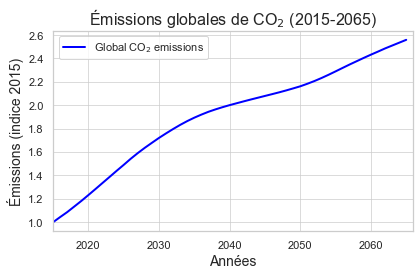

In [6]:
### Fig. 1 ###
import seaborn as sns

# Appliquer un style de graphique avec seaborn
sns.set_theme(style="whitegrid")

plt.figure()
# Utilisation de LaTeX pour écrire CO₂ avec le 2 indicé en bas
plt.plot(years,np.transpose(eco2[ind_base,:]),color="blue", linewidth=2, label="Global CO$_2$ emissions")
# Ajout de titres et labels
plt.ylabel('Émissions (indice 2015)', fontsize=14)
plt.title('Émissions globales de CO$_2$ (2015-2065)', fontsize=16)
plt.xlabel('Années', fontsize=14)
plt.xlim(2015, 2066)
plt.grid(True, linestyle='-', alpha=0.7)  # Ajout d'une grille
plt.legend()  # Légende
plt.tight_layout()  # Ajustement automatique des marges
plt.show()

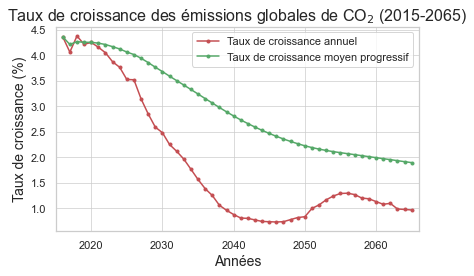

In [7]:
# Calcul du taux de croissance annuel
growth_rate_eco2 = (np.diff(eco2[ind_base, :]) / eco2[ind_base, :-1]) * 100

# Calcul du taux de croissance moyen progressif (CAGR - Compound Annual Growth Rate)
taux_croissance_moyen_progressif = np.zeros(len(years) - 1)
for i in range(1, len(years)):
    taux_croissance_moyen_progressif[i - 1] = (eco2[ind_base, i] / eco2[ind_base, 0]) ** (1 / i) - 1
taux_croissance_moyen_progressif *= 100  # Conversion en pourcentage

# Années correspondantes pour le taux de croissance (une année de moins)
years_growth = years[1:]

# Tracer le taux de croissance des émissions de CO2
plt.figure()
plt.plot(years_growth, growth_rate_eco2, color="r", marker='o', linestyle='-', markersize=3, label="Taux de croissance annuel")
plt.plot(years_growth, taux_croissance_moyen_progressif, marker='o', linestyle='-', color='g', markersize=3, label='Taux de croissance moyen progressif')
plt.ylabel('Taux de croissance (%)', fontsize=14)
plt.title('Taux de croissance des émissions globales de CO$_2$ (2015-2065)', fontsize=16)
plt.xlabel('Années', fontsize=14)
plt.xlim(2015, 2066)
plt.grid(True, linestyle='-', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()

# # Création de la figure avec deux sous-graphiques côte à côte
# fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))  # 1 ligne, 2 colonnes

# # Graphique 1 : Taux de croissance annuel
# ax1.plot(years_growth, growth_rate_eco2, marker='o', linestyle='-', color='b', markersize=3, label='Taux de croissance annuel')
# ax1.set_title('Évolution du taux de croissance annuel des émissions de CO$_2$ \n (2015-2065)', fontsize=16)
# ax1.set_xlabel('Années', fontsize=14)
# ax1.set_ylabel('Taux de Croissance (%)', fontsize=14)
# ax2.set_xticks(years[1::5])  
# ax1.grid(True, linestyle='-', alpha=0.7)
# ax1.legend()

# # Graphique 2 : Taux de croissance moyen progressif (CAGR)
# ax2.plot(years_growth, taux_croissance_moyen_progressif, marker='o', linestyle='-', color='g', markersize=3, label='Taux de croissance moyen progressif')
# ax2.set_title("Évolution du taux de croissance moyen des émissions de CO$_2$ \n (2015-2065)", fontsize=16)
# ax2.set_xlabel('Années', fontsize=14)
# ax2.set_ylabel('Taux de croissance moyen (%)', fontsize=14)
# ax2.grid(True, linestyle='-', alpha=0.7)
# ax2.legend()

# # Affichage 
# plt.tight_layout()
# plt.show()



### Température annuelle moyenne globale

Le code suivant permet d'estimer l'augmentation de la température moyenne mondiale à l'horizon 2065 en fonction des émissions de $CO_2$, en recourant au concept du TCRE.

In [8]:
# # Define the TCRE value (in °C per 1000 GtCO2)
# # See Matthews et al. for more information: https://fr.wikipedia.org/wiki/R%C3%A9ponse_climatique_transitoire_aux_%C3%A9missions_cumul%C3%A9es_de_dioxyde_de_carbone

# # Température annuelle moyenne globale
# emi_2015 = 36.32 # émissions historiques en GtCO2 -> source
# def TCRE_Matthews_et_al(emi_an1, ev_emi): # (2018)
#     Gt_2_Tt = 1e-3 #coef à chercher
#     C_2_CO2 = 3.7 #
#     emi_cum = emi_an1 / C_2_CO2 * Gt_2_Tt * ev_emi.sum()
#     return [dT*emi_cum for dT in [0.8, 1.35, 2.4]] # checker les coef
# print(TCRE_Matthews_et_al(emi_2015, data_tp['ECO2_w'][base_nb-1,:]))

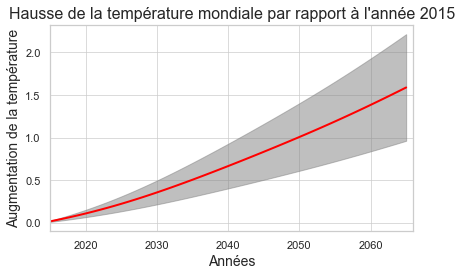

In [9]:
# Calcul du TCRE
emi_2015 = 36.32 # émissions historiques en GtCO2
conv = 1e-3 * 12 / 44 # conversion GtCO2 -> TtC

emi_cum = emi_2015 = 36.32 * np.cumsum(eco2[ind_base, :]) * conv

# Calcul des courbes
main_curve = emi_cum * 1.65
upper_bound = emi_cum * 2.3
lower_bound = emi_cum * 1.0

# Tracer la courbe principale et la zone d'incertitude
plt.figure()
plt.plot(years[0:], main_curve, color="red", linewidth=2)
plt.fill_between(years[0:], lower_bound, upper_bound, color='gray', alpha=0.5, label="Zone d'incertitude")

# Ajout de titres et labels
plt.ylabel('Augmentation de la température', fontsize=14)
plt.title("Hausse de la température mondiale par rapport à l'année 2015", fontsize=16)
plt.xlabel('Années', fontsize=14)
plt.xlim(2015, 2066)
plt.grid(True, linestyle='-', alpha=0.7)
plt.tight_layout()
plt.show()

## *A. 2. Kaya identity*

As you may know, global $CO_2$ emissions can be broken down into a product: *Population * GDP per capita * Energy intensity of GDP * Carbon intensity of GDP*. That's the Kaya identity.

**Plot the evolution of the four Kaya factors and comment, considering your choice of baseline.**

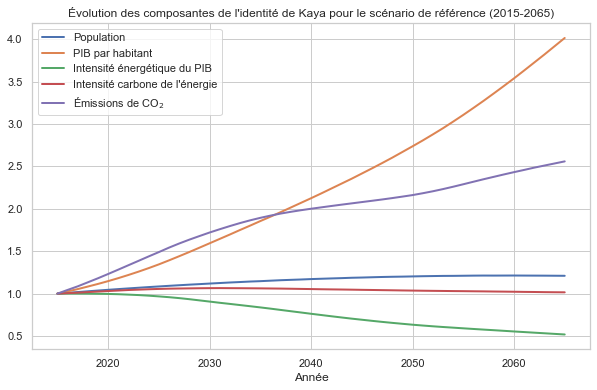

In [10]:
# Extract the data for the baseline scenario
population_baseline = data_tp['Pop_w'][ind_base, :]
gdp_per_capita_baseline = data_tp['GDPcap_w'][ind_base, :]
energy_intensity_baseline = data_tp['EI_w'][ind_base, :]
carbon_intensity_baseline = data_tp['CI_w'][ind_base, :]
emissions_baseline = data_tp['ECO2_w'][ind_base, :]

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(years, population_baseline, label='Population', linewidth=2)
plt.plot(years, gdp_per_capita_baseline, label='PIB par habitant', linewidth=2)
plt.plot(years, energy_intensity_baseline, label='Intensité énergétique du PIB', linewidth=2)
plt.plot(years, carbon_intensity_baseline, label='Intensité carbone de l\'énergie', linewidth=2)
plt.plot(years, emissions_baseline, label='Émissions de CO$_2$', linewidth=2)

plt.xlabel('Année')
plt.title('Évolution des composantes de l\'identité de Kaya pour le scénario de référence (2015-2065)')
plt.legend()
plt.grid(True)
plt.show()

In [11]:
# Années de début et de fin pour chaque période
periods = [(2015, 2020), (2020, 2045), (2045, 2065)]

# Fonction pour calculer la variation cumulative sur une période
def cumulative_variation(data, start, end, years):
    start_index = np.where(years == start)[0][0]
    end_index = np.where(years == end)[0][0]
    return (data[end_index] - data[start_index]) / data[start_index] * 100

# Calculer la contribution de chaque facteur de Kaya pour chaque période
contributions_baseline = []

for (start, end) in periods:
    # Variations cumulatives pour chaque facteur de Kaya
    pop_variation = cumulative_variation(population_baseline, start, end, years)
    gdp_pc_variation = cumulative_variation(gdp_per_capita_baseline, start, end, years)
    ei_variation = cumulative_variation(energy_intensity_baseline, start, end, years)
    ci_variation = cumulative_variation(carbon_intensity_baseline, start, end, years)
    
    # Variation cumulative des émissions de CO2
    co2_variation = cumulative_variation(emissions_baseline, start, end, years)
    
    # Calcul des contributions relatives de chaque facteur
    kaya_factors_sum = pop_variation + gdp_pc_variation + ei_variation + ci_variation
    contribution_pop = (pop_variation / kaya_factors_sum) * co2_variation
    contribution_gdp_pc = (gdp_pc_variation / kaya_factors_sum) * co2_variation
    contribution_ei = (ei_variation / kaya_factors_sum) * co2_variation
    contribution_ci = (ci_variation / kaya_factors_sum) * co2_variation
    
    # Ajouter les résultats pour chaque période
    contributions_baseline.append({
        "Période": f"{start}-{end}",
        "Contribution Population (%)": contribution_pop,
        "Contribution PIB par habitant (%)": contribution_gdp_pc,
        "Contribution Intensité énergétique (%)": contribution_ei,
        "Contribution Intensité carbone (%)": contribution_ci,
        "Variation cumulée des émissions de CO$_2$ (%)": co2_variation
    })

# Convertir les résultats en DataFrame pour une présentation claire
df_contributions_baseline = pd.DataFrame(contributions_baseline)
print("Contribution des facteurs de Kaya à l'évolution des émissions de CO\u2082 par période :\n")
print(df_contributions_baseline)

# Convertir le DataFrame en tableau LaTeX
latex_table = df_contributions_baseline.to_latex(index=False, float_format="%.2f")

# Afficher le tableau LaTeX
print(latex_table)

Contribution des facteurs de Kaya à l'évolution des émissions de CO₂ par période :

     Période  Contribution Population (%)  Contribution PIB par habitant (%)  \
0  2015-2020                     4.759374                          15.565896   
1  2020-2045                     9.999110                          79.848587   
2  2045-2065                     0.995919                          38.159887   

   Contribution Intensité énergétique (%)  Contribution Intensité carbone (%)  \
0                               -0.375671                            3.234895   
1                              -22.047495                            0.990875   
2                              -14.476646                           -1.611313   

   Variation cumulée des émissions de CO$_2$ (%)  
0                                      23.184495  
1                                      68.791077  
2                                      23.067847  
\begin{tabular}{lrrrrr}
\toprule
  Période &  Contribution Populat

/var/folders/2c/qgn4pwyd26n3rkxm7m_r4nwm0000gn/T/ipykernel_3846/4189986789.py:46: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  latex_table = df_contributions_baseline.to_latex(index=False, float_format="%.2f")


## *A.3. Carbon intensity and energy intensity phases*

**Plot the energy intensity of GDP (x axis) against the carbon intensity of energy (y axis). Can you identify some phases in the evolution of these two factors? How would you explain this phenomenon?**

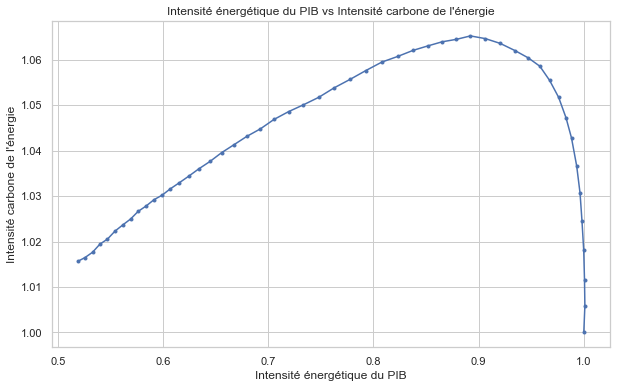

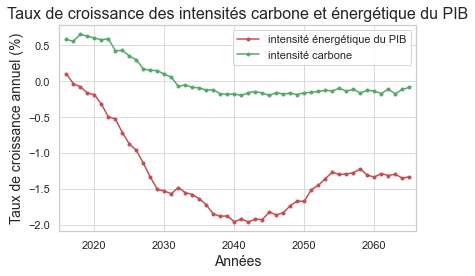

In [12]:
# Plot the energy intensity of GDP against the carbon intensity of energy
plt.figure(figsize=(10, 6))
plt.plot(energy_intensity_baseline, carbon_intensity_baseline, marker='.', linestyle='-', color='b')
plt.xlabel('Intensité énergétique du PIB')
plt.ylabel('Intensité carbone de l\'énergie')
plt.title('Intensité énergétique du PIB vs Intensité carbone de l\'énergie')
plt.grid(True)
plt.show()

# Calcul des taux de croissance annuels
growth_rate_en_in = (np.diff(energy_intensity_baseline[:]) / energy_intensity_baseline[:-1]) * 100
growth_rate_carbon_in = (np.diff(carbon_intensity_baseline[:]) / carbon_intensity_baseline[:-1]) * 100

# Tracer le taux de croissance des émissions de CO2
plt.figure()
plt.plot(years_growth, growth_rate_en_in, color="r", marker='o', linestyle='-', markersize=3, label="intensité énergétique du PIB")
plt.plot(years_growth, growth_rate_carbon_in, marker='o', linestyle='-', color='g', markersize=3, label='intensité carbone')
plt.ylabel('Taux de croissance annuel (%)', fontsize=14)
plt.title('Taux de croissance des intensités carbone et énergétique du PIB', fontsize=16)
plt.xlabel('Années', fontsize=14)
plt.xlim(2015, 2066)
plt.grid(True, linestyle='-', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()

Période 2015-2030 :
  Pente (slope) : -0.589
  Intercept : 1.613
  Coefficient de corrélation (R²) : 0.695

Période 2030-2055 :
  Pente (slope) : 0.121
  Intercept : 0.960
  Coefficient de corrélation (R²) : 0.980

Période 2055-2065 :
  Pente (slope) : 0.194
  Intercept : 0.915
  Coefficient de corrélation (R²) : 0.998



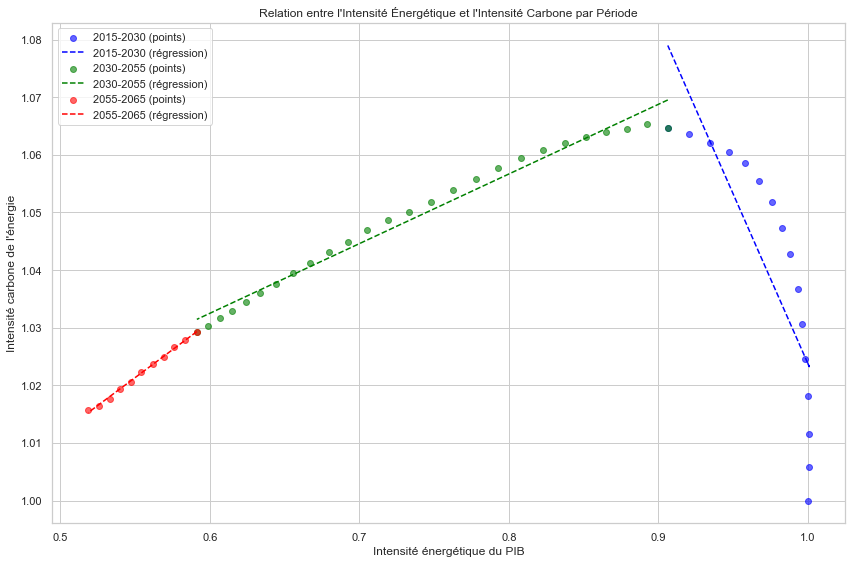

In [13]:
# Années et périodes définies pour l'analyse
periods = [(2015, 2030), (2030, 2055), (2055, 2065)]

# Données pour l'intensité énergétique et l'intensité carbone du scénario baseline
energy_intensity_baseline = data_tp['EI_w'][ind_base, :]  # Intensité énergétique du PIB
carbon_intensity_baseline = data_tp['CI_w'][ind_base, :]  # Intensité carbone de l'énergie

# Initialisation de la figure
plt.figure(figsize=(12, 8))
colors = ['blue', 'green', 'red']
period_labels = [f"{start}-{end}" for start, end in periods]

# Boucle sur chaque période pour effectuer la régression linéaire et tracer les résultats
for i, (start, end) in enumerate(periods):
    # Déterminer les indices de début et de fin pour chaque période
    start_index = np.where(years == start)[0][0]
    end_index = np.where(years == end)[0][0]

    # Extraire les données de la période
    energy_intensity_period_baseline = energy_intensity_baseline[start_index:end_index + 1]
    carbon_intensity_period_baseline = carbon_intensity_baseline[start_index:end_index + 1]

    # Régression linéaire entre l'intensité énergétique et l'intensité carbone pour la période
    slope, intercept, r_value, p_value, std_err = linregress(energy_intensity_period_baseline, carbon_intensity_period_baseline)

    # Afficher la pente et le coefficient de corrélation
    print(f"Période {start}-{end} :")
    print(f"  Pente (slope) : {slope:.3f}")
    print(f"  Intercept : {intercept:.3f}")
    print(f"  Coefficient de corrélation (R²) : {r_value**2:.3f}")
    print()

    # Tracer les points de la période et la ligne de régression
    plt.scatter(energy_intensity_period_baseline, carbon_intensity_period_baseline, label=f"{period_labels[i]} (points)", color=colors[i], alpha=0.6)
    plt.plot(energy_intensity_period_baseline, slope * energy_intensity_period_baseline + intercept, color=colors[i], linestyle='--', label=f"{period_labels[i]} (régression)")

# Configuration du graphique
plt.xlabel("Intensité énergétique du PIB")
plt.ylabel("Intensité carbone de l'énergie")
plt.title("Relation entre l'Intensité Énergétique et l'Intensité Carbone par Période")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [14]:
# ## BONUS, not used in the report ##

# import numpy as np
# import pandas as pd
# import statsmodels.api as sm
# from statsmodels.formula.api import ols
# import matplotlib.pyplot as plt

# # Chargement des données pour les émissions de CO2 pour les scénarios baseline
# # Utiliser uniquement les scénarios baseline 
# eco2_baseline = data_tp['ECO2_w'][:216, :]  # Sélection des scénarios baseline
# drivers_baseline = drivers[:216, :]  # Paramètres des scénarios baseline
# drivers_names2 = ["mitigation", "leader_growth", "productivity_catch_up", "fossil_fuels",
#                  "energy_demand_behavior", "energy_efficiency", "low_carbon_technologies",
#                  "labor_market_rigidities"]

# # Calculer la somme des émissions de CO2 pour chaque scénario baseline
# # (intégrant la variabilité temporelle pour une vue d'ensemble)
# total_eco2_baseline = eco2_baseline.sum(axis=1)

# # Création du DataFrame pour l'analyse ANOVA
# df = pd.DataFrame(drivers_baseline, columns=drivers_names2)
# df["Total_CO2_Emissions"] = total_eco2_baseline

# # Formule pour l'ANOVA : Total_CO2_Emissions ~ drivers_names2
# formula = 'Total_CO2_Emissions ~ ' + ' + '.join(drivers_names2)
# model = ols(formula, data=df).fit()
# anova_results = sm.stats.anova_lm(model, typ=2)

# # Affichage des résultats de l'ANOVA
# print("ANOVA - Contribution des paramètres à la variance des émissions de CO$_2$ :\n")
# print(anova_results)

# # Visualisation des contributions des paramètres à la variance des émissions de CO$_2$
# plt.figure(figsize=(10, 6))
# anova_results["sum_sq"].plot(kind='bar', color='skyblue')
# plt.title("Contribution des paramètres à la variance des émissions de CO$_2$ dans les scénarios baseline")
# plt.xlabel("Paramètres")
# plt.ylabel("Variance des émissions de CO$_2$")
# plt.xticks(rotation=45, ha='right')
# plt.tight_layout()
# plt.show()


# **B. Analysis of mitigation scenarios**

You are now going to analyse a mitigation scenario (carbon price) corresponding to your baseline. To do so, add 216 to the baseline number (because there are 216 baseline scenarios in the database)

In [15]:
# climat index
ind_climat = ind_base + 216

for i in range(len(drivers_names)):
    print(int(drivers[ind_climat][i]), '  ', drivers_names[i])

550    mitigation
2    leader growth
2    productivity catch-up
2    fossil fuels
1    energy demand behavior
0    energy efficiency
1    low-carbon technologies
0    labor markets rigidities


## *B. 1. Kaya identity*

**Same question as A.2. for the mitigation scenario**

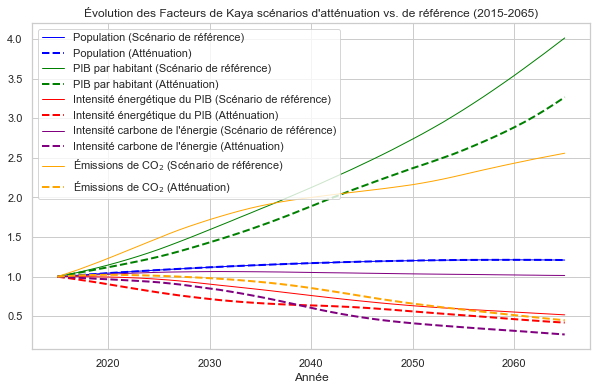

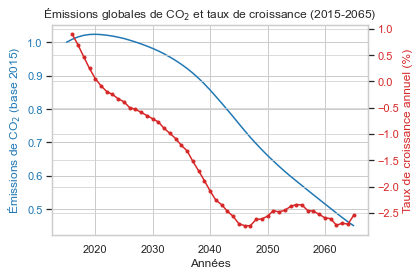

In [16]:
# Extract the data for the mitigation scenario
population = data_tp['Pop_w'][ind_climat, :]
gdp_per_capita = data_tp['GDPcap_w'][ind_climat, :]
energy_intensity = data_tp['EI_w'][ind_climat, :]
carbon_intensity = data_tp['CI_w'][ind_climat, :]
emissions = data_tp['ECO2_w'][ind_climat, :]

# Extract the data for the baseline scenario
population_baseline = data_tp['Pop_w'][ind_base, :]
gdp_per_capita_baseline = data_tp['GDPcap_w'][ind_base, :]
energy_intensity_baseline = data_tp['EI_w'][ind_base, :]
carbon_intensity_baseline = data_tp['CI_w'][ind_base, :]
emissions_baseline = data_tp['ECO2_w'][ind_base, :]

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(years, population_baseline, label='Population (Scénario de référence)', linewidth=1, color='blue')
plt.plot(years, population, label='Population (Atténuation)', linewidth=2, linestyle='--', color='blue')

plt.plot(years, gdp_per_capita_baseline, label='PIB par habitant (Scénario de référence)', linewidth=1, color='green')
plt.plot(years, gdp_per_capita, label='PIB par habitant (Atténuation)', linewidth=2, linestyle='--', color='green')

plt.plot(years, energy_intensity_baseline, label='Intensité énergétique du PIB (Scénario de référence)', linewidth=1, color='red')
plt.plot(years, energy_intensity, label='Intensité énergétique du PIB (Atténuation)', linewidth=2, linestyle='--', color='red')

plt.plot(years, carbon_intensity_baseline, label='Intensité carbone de l\'énergie (Scénario de référence)', linewidth=1, color='purple')
plt.plot(years, carbon_intensity, label='Intensité carbone de l\'énergie (Atténuation)', linewidth=2, linestyle='--', color='purple')

plt.plot(years, emissions_baseline, label='Émissions de CO$_2$ (Scénario de référence)', linewidth=1, color='orange')
plt.plot(years, emissions, label='Émissions de CO$_2$ (Atténuation)', linewidth=2, linestyle='--', color='orange')

plt.xlabel('Année')
plt.title('Évolution des Facteurs de Kaya scénarios d\'atténuation vs. de référence (2015-2065)')
plt.legend()
plt.grid(True)
plt.show()

# Calcul du taux de croissance annuel
growth_rate_eco2_att = (np.diff(emissions[:]) / emissions[:-1]) * 100

# Années correspondantes pour le taux de croissance (une année de moins)
years_growth = years[1:]

# Tracer le taux de croissance des émissions de CO2
fig, ax1 = plt.subplots()

# Plot the emissions data
color = 'tab:blue'
ax1.set_xlabel('Années')
ax1.set_ylabel('Émissions de CO$_2$ (base 2015)', color=color)
ax1.plot(years, emissions, color=color, label='Émissions de CO$_2$ (base 2015)')
ax1.tick_params(axis='y', labelcolor=color)
#ax1.legend(loc='lower left', fontsize='small')

# Create a second y-axis to plot the growth rate
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Taux de croissance annuel (%)', color=color)
ax2.plot(years_growth, growth_rate_eco2_att, color=color, marker='o', linestyle='-', markersize=3, label='Taux de croissance annuel')
ax2.tick_params(axis='y', labelcolor=color)
#ax2.legend(loc='upper right', fontsize='small')

plt.title('Émissions globales de CO$_2$ et taux de croissance (2015-2065)')
plt.grid(True, linestyle='-', alpha=0.7)
plt.tight_layout()
plt.show()

## *B.2. GDP: baseline vs mitigation scenario*

You may already observe on the plots that climate policies reduce GDP per capita in IMACLIM-R (or you may not!). **Compute and plot the annual GDP variation (with regard to the baseline) in the mitigation scenario. Convert it into mean annual variations at a 2030/2050/2065 horizon, and comment.**

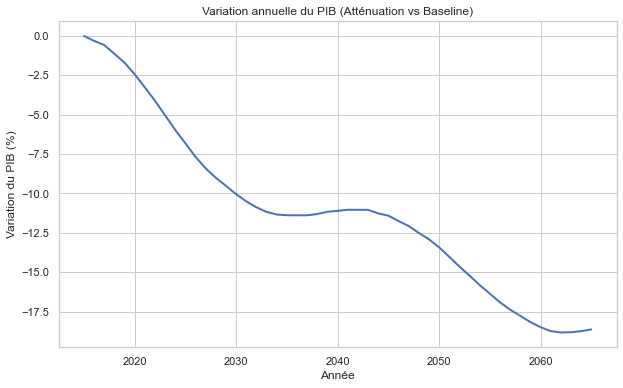

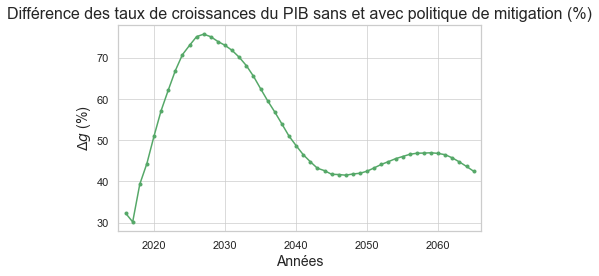

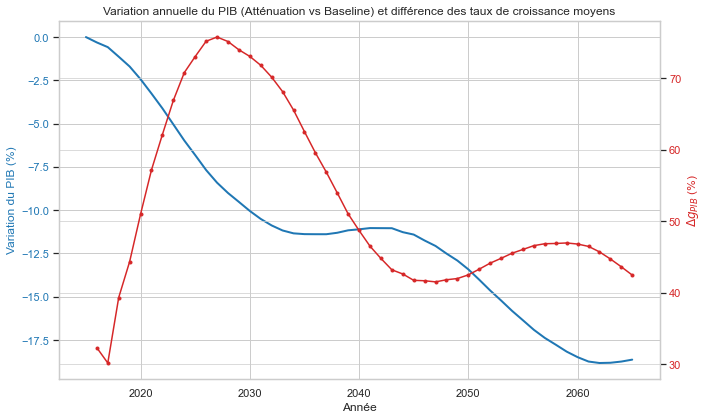

In [17]:
# Extract the GDP per capita data for the baseline and mitigation scenarios
gdp_baseline = data_tp['GDP_w'][ind_base, :]
gdp_mitigation = data_tp['GDP_w'][ind_climat, :]

# Compute the annual GDP per capita variation with regard to the baseline
gdp_variation = (gdp_mitigation - gdp_baseline) / gdp_baseline * 100

## Le taux de croissance moyen n'est pas égal à la moyenne des taux de croissance !!
def gdp_growth_loss(gdp_ref, gdp_new, ind_year):
    growth_ref = gdp_ref[ind_year] / gdp_ref[0]
    growth_new = gdp_new[ind_year] / gdp_new[0]
    return (growth_ref ** (1/ind_year) - growth_new ** (1/ind_year))*100

## On ne divise pas par le taux de coissance initial dans return car il est égal à 1. 

# Calculer la différence des taux de croissance du PIB sans et avec politique de mitigation pour chaque année
diff_taux_PIB_courbe = np.zeros(len(years) - 1)
diff_taux_PIB_courbe = [gdp_growth_loss(data_tp['GDP_w'][ind_base], data_tp['GDP_w'][ind_climat], i) for i in range(1, len(years))]
diff_taux_PIB_courbe = 100 * np.array(diff_taux_PIB_courbe)
# Années correspondantes pour le taux de croissance (une année de moins)
years_growth = years[1:]

# Plot the annual GDP per capita variation
plt.figure(figsize=(10, 6))
plt.plot(years, gdp_variation, linewidth=2, color='b')
plt.xlabel('Année')
plt.ylabel('Variation du PIB (%)')
plt.title('Variation annuelle du PIB (Atténuation vs Baseline)')
plt.grid(True)
plt.show()


# Tracer le taux de croissance des émissions de CO2
plt.figure()
plt.plot(years_growth, diff_taux_PIB_courbe, marker='o', linestyle='-', color='g', markersize=3)
plt.ylabel('$\Delta g$ (%)', fontsize=14)
plt.title('Différence des taux de croissances du PIB sans et avec politique de mitigation (%)', fontsize=16)
plt.xlabel('Années', fontsize=14)
plt.xlim(2015, 2066)
plt.grid(True, linestyle='-', alpha=0.7)
#plt.legend()
plt.tight_layout()
plt.show()
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot the GDP variation on the first y-axis
color = 'tab:blue'
ax1.set_xlabel('Année')
ax1.set_ylabel('Variation du PIB (%)', color=color)
ax1.plot(years, gdp_variation, linewidth=2, color=color)
ax1.tick_params(axis='y', labelcolor=color)

# Create a second y-axis to plot the GDP growth difference
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('$\Delta g_{PIB}$ (%)', color=color)
ax2.plot(years_growth, diff_taux_PIB_courbe, marker='o', linestyle='-', color=color, markersize=3)
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Variation annuelle du PIB (Atténuation vs Baseline) et différence des taux de croissance moyens')
plt.grid(True, linestyle='-', alpha=0.7)
plt.tight_layout()
plt.show()

In [18]:
## BONUS, not used in the report ##

# Calcul de la perte cumulative en PIB en pourcentage
cumulative_loss_percentage = np.sum(gdp_baseline - gdp_mitigation) / np.sum(gdp_baseline) * 100

# Affichage des résultats
print(f"Perte cumulative de PIB due à la politique climatique : {cumulative_loss_percentage:.2f}%")

# Définition des horizons d'analyse
horizons = [2030, 2050, 2065]

# Données de base pour le PIB et l'intensité énergétique pour les scénarios baseline et d'atténuation
energy_intensity_baseline = data_tp['EI_w'][ind_base, :]
energy_intensity_mitigation = data_tp['EI_w'][ind_climat, :]

# Initialisation de listes pour stocker les résultats
ratios_pib = []
indices_synthétiques = []

# Calcul pour chaque horizon
for horizon in horizons:
    # Trouver l'index correspondant à chaque horizon
    index = np.where(years == horizon)[0][0]

    # Calcul du ratio de PIB (atténuation / baseline)
    ratio_pib = gdp_mitigation[index] / gdp_baseline[index] * 100  # en pourcentage

    # Calcul de l'indice synthétique des coûts économiques
    # Indice = (Variation PIB + Variation Intensité énergétique) / 2
    variation_pib = (gdp_mitigation[index] - gdp_baseline[index]) / gdp_baseline[index] * 100
    variation_intensité_énergétique = (energy_intensity_mitigation[index] - energy_intensity_baseline[index]) / energy_intensity_baseline[index] * 100
    indice_synthétique = (variation_pib + variation_intensité_énergétique) / 2

    # Stocker les résultats
    ratios_pib.append(ratio_pib)
    indices_synthétiques.append(indice_synthétique)

# Création d'un DataFrame pour afficher les résultats
df_resultats = pd.DataFrame({
    "Horizon": horizons,
    "Ratio de PIB (%)": ratios_pib,
    "Indice Synthétique des Coûts Économiques (%)": indices_synthétiques
})

print("Impact économique des politiques climatiques par horizon :\n")
print(df_resultats)

Perte cumulative de PIB due à la politique climatique : 13.25%
Impact économique des politiques climatiques par horizon :

   Horizon  Ratio de PIB (%)  Indice Synthétique des Coûts Économiques (%)
0     2030         89.956580                                    -15.362836
1     2050         86.583755                                    -12.345426
2     2065         81.369414                                    -18.742998


Matrice de corrélation entre les facteurs de Kaya et les variations de PIB :
                    Population  GDP per capita  Energy Intensity  \
Population           1.000000        0.899244         -0.943866   
GDP per capita       0.899244        1.000000         -0.981305   
Energy Intensity    -0.943866       -0.981305          1.000000   
Carbon Intensity    -0.009355       -0.383316          0.335575   
GDP Variation (%)   -0.950182       -0.940792          0.930534   

                   Carbon Intensity  GDP Variation (%)  
Population                -0.009355          -0.950182  
GDP per capita            -0.383316          -0.940792  
Energy Intensity           0.335575           0.930534  
Carbon Intensity           1.000000           0.074325  
GDP Variation (%)          0.074325           1.000000  


/var/folders/2c/qgn4pwyd26n3rkxm7m_r4nwm0000gn/T/ipykernel_3846/718252767.py:23: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar(label="Coefficient de corrélation")


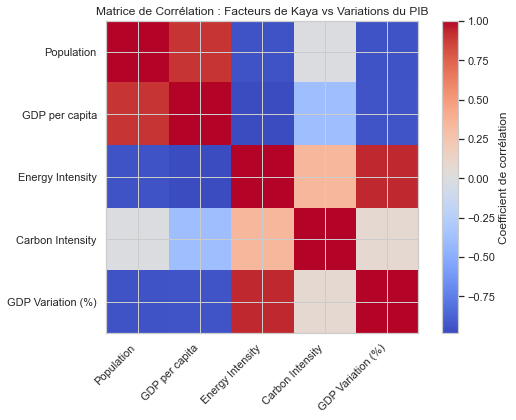

In [19]:
## BONUS, not used in the report ##

# Création d'un DataFrame pour contenir les facteurs de Kaya et les variations de PIB
data = {
    "Population": population_baseline,
    "GDP per capita": gdp_per_capita_baseline,
    "Energy Intensity": energy_intensity_baseline,
    "Carbon Intensity": carbon_intensity_baseline,
    "GDP Variation (%)": gdp_variation
}

df = pd.DataFrame(data)

# Calcul de la matrice de corrélation
correlation_matrix = df.corr()

# Affichage de la matrice de corrélation
print("Matrice de corrélation entre les facteurs de Kaya et les variations de PIB :\n", correlation_matrix)

# Visualisation de la matrice de corrélation avec une heatmap
plt.figure(figsize=(8, 6))
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='nearest')
plt.colorbar(label="Coefficient de corrélation")
plt.xticks(range(len(correlation_matrix)), correlation_matrix.columns, rotation=45, ha='right')
plt.yticks(range(len(correlation_matrix)), correlation_matrix.columns)
plt.title("Matrice de Corrélation : Facteurs de Kaya vs Variations du PIB")
plt.tight_layout()
plt.show()


In [20]:
# ## BONUS, not used in the report ##

# # Création du DataFrame pour l'analyse ANOVA
# df = pd.DataFrame(drivers, columns=drivers_names)

# # Réaliser l'ANOVA pour les émissions de CO2
# model_emissions = ols('Emissions_CO2 ~ ' + ' + '.join(drivers_names), data=eco2).fit()
# anova_results_emissions = sm.stats.anova_lm(model_emissions, typ=2)
# print("ANOVA - Contribution des paramètres à la variance des émissions de CO$_2$ :\n", anova_results_emissions)

# # Réaliser l'ANOVA pour la croissance économique (PIB)
# model_gdp = ols('GDP ~ ' + ' + '.join(drivers_names), data=gdp_mitigation).fit()
# anova_results_gdp = sm.stats.anova_lm(model_gdp, typ=2)
# print("\nANOVA - Contribution des paramètres à la variance de la croissance économique :\n", anova_results_gdp)

# # Visualisation des résultats ANOVA pour les émissions de CO2
# plt.figure(figsize=(10, 6))
# anova_results_emissions["sum_sq"].plot(kind='bar', color='skyblue')
# plt.title("Contribution des paramètres à la variance des émissions de CO$_2$")
# plt.xlabel("Paramètres")
# plt.ylabel("Variance des émissions de CO$_2$")
# plt.xticks(rotation=45, ha='right')
# plt.tight_layout()
# plt.show()

# # Visualisation des résultats ANOVA pour le PIB
# plt.figure(figsize=(10, 6))
# anova_results_gdp["sum_sq"].plot(kind='bar', color='salmon')
# plt.title("Contribution des paramètres à la variance de la croissance économique (PIB)")
# plt.xlabel("Paramètres")
# plt.ylabel("Variance du PIB")
# plt.xticks(rotation=45, ha='right')
# plt.tight_layout()
# plt.show()


# **C. Analysis of a Scenario set**

Sometimes, scenario analysis deals with a large number of scenarios that need to be compared globally.

## *C.1. Baseline scenario database: cumulated emissions vs mean annual growth plot*

**Compute the cumulated $CO_2$ emissions and the mean annual growth between 2015 and 2065 in the set of baseline scenario and plot the results**. Hint: every scenario should be a point on the graph, with the mean annual growth on the x axis and the cumulated $CO_2$ emissions on the y axis.

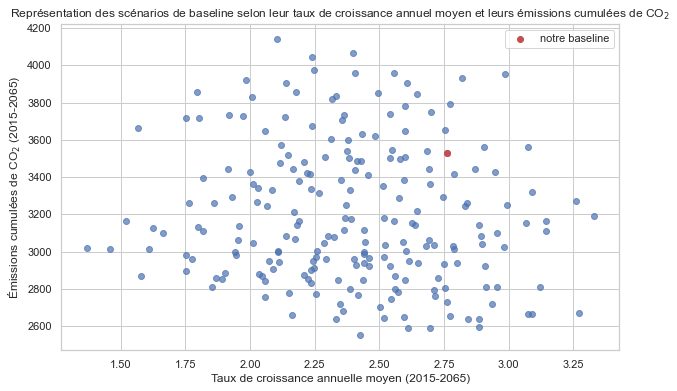

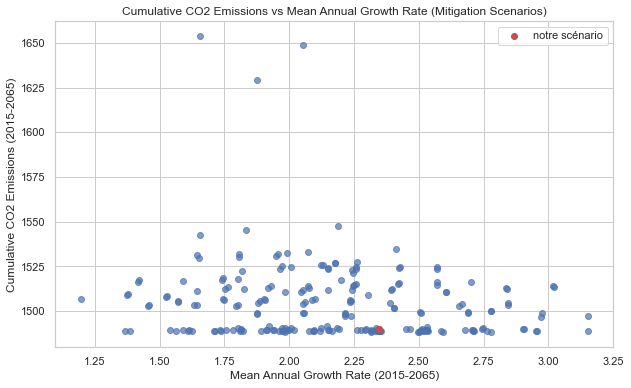

In [21]:
# Calculate the cumulative CO2 emissions for each baseline scenario
Emi_2015_GtCO2 = 36.32 # 2015 global CO2 emissions in GtCO2
cumulative_emissions_baseline = data_tp['ECO2_w'].sum(axis=1) * Emi_2015_GtCO2

# Calcul du taux de croissance annuel moyen du PIB/habitant
# pondéré sur la période couverte par les données
grow_mean = 100 * (data_tp['GDPcap_w'][:,-1] ** (1. / data_tp['GDPcap_w'].shape[1]) - 1)

# Plot the results
# on ne conserve que les scénarios de baseline
plt.figure(figsize=(10, 6))
plt.scatter(grow_mean[0:216], cumulative_emissions_baseline[0:216], color='b', alpha=0.7)
plt.scatter(grow_mean[ind_base], cumulative_emissions_baseline[ind_base], color='r', label='notre baseline')
plt.xlabel('Taux de croissance annuelle moyen (2015-2065)')
plt.ylabel('Émissions cumulées de CO$_2$ (2015-2065)')
plt.title('Représentation des scénarios de baseline selon leur taux de croissance annuel moyen et leurs émissions cumulées de CO$_2$')
plt.grid(True)
plt.legend()
plt.show()

# Plot the results
# on ne conserve que les scénarios d'atténuation
plt.figure(figsize=(10, 6))
plt.scatter(grow_mean[216:], cumulative_emissions_baseline[216:], color='b', alpha=0.7)
plt.scatter(grow_mean[ind_climat], cumulative_emissions_baseline[ind_climat], color='r', label='notre scénario')
plt.xlabel('Mean Annual Growth Rate (2015-2065)')
plt.ylabel('Cumulative CO2 Emissions (2015-2065)')
plt.title('Cumulative CO2 Emissions vs Mean Annual Growth Rate (Mitigation Scenarios)')
plt.grid(True)
plt.legend()
plt.show()

## *C.2. Baseline + Mitigation scenario database: mean annual growth*

**Plot on the same histogram the mean annual growth in the baseline vs mitigation scenarios. Comment**. Hint: use the plt.hist function

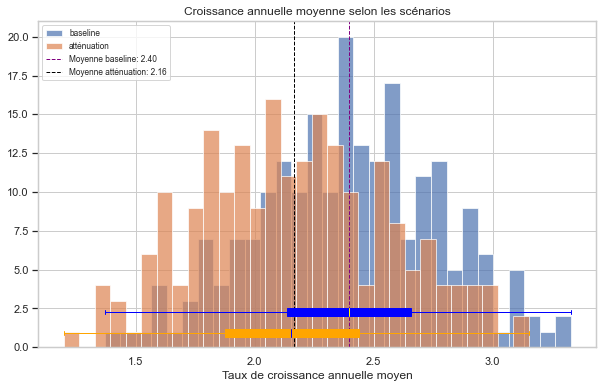

In [22]:
import matplotlib.pyplot as plt
import numpy as np

# Données pour les scénarios baseline et atténuation
grow_mean_baseline = grow_mean[0:216]
grow_mean_mitigation = grow_mean[216:]

# Créer une figure et des axes
fig, ax1 = plt.subplots(figsize=(10, 6))

# Tracer l'histogramme pour les scénarios baseline et atténuation
ax1.hist(grow_mean_baseline, alpha=0.7, label='baseline', bins=30)
ax1.hist(grow_mean_mitigation, alpha=0.7, label='atténuation', bins=30)

# Calculer les moyennes
mean_baseline = np.mean(grow_mean_baseline)
mean_mitigation = np.mean(grow_mean_mitigation)

# Ajouter des lignes verticales pour les moyennes
ax1.axvline(mean_baseline, color='purple', linestyle='dashed', linewidth=1, label=f'Moyenne baseline: {mean_baseline:.2f}')
ax1.axvline(mean_mitigation, color='black', linestyle='dashed', linewidth=1, label=f'Moyenne atténuation: {mean_mitigation:.2f}')

# Ajouter une légende et des titres
ax1.legend(loc='upper left', fontsize='x-small')
ax1.set_title('Croissance annuelle moyenne selon les scénarios')
ax1.set_xlabel('Taux de croissance annuelle moyen')

# Créer un axe secondaire pour les boxplots
ax2 = ax1.twinx()

# Tracer les boxplots horizontalement sous l'histogramme
ax2.boxplot(
    [grow_mean_baseline],
    vert=False,
    positions=[0.5],
    widths=0.6,
    patch_artist=True,
    labels=['baseline'],
    boxprops={'facecolor': 'blue', 'color': 'blue'},
    medianprops={'color': 'yellow'},
    whiskerprops={'color': 'blue'},
    capprops={'color': 'blue'},
    flierprops={'markerfacecolor': 'blue', 'markeredgecolor': 'blue'}
)

ax2.boxplot(
    [grow_mean_mitigation],
    vert=False,
    positions=[-1],
    widths=0.6,
    patch_artist=True,
    labels=['mitigation policy'],
    boxprops={'facecolor': 'orange', 'color': 'orange'},
    medianprops={'color': 'blue'},
    whiskerprops={'color': 'orange'},
    capprops={'color': 'orange'},
    flierprops={'markerfacecolor': 'orange', 'markeredgecolor': 'orange'}
)

# Ajuster les limites de l'axe y pour afficher les boxplots sous l'histogramme
ax2.set_ylim(-2, ax1.get_ylim()[1])

# Masquer les ticks de l'axe y secondaire
ax2.yaxis.set_ticks([])

# Afficher le graphique
plt.show()

## *C.3. Analysis of variance (ANOVA) - for those who have time* 

**Choose a model's output ($CO_2$ emissions or economic growth) in a scenario subset, either baseline or mitigation. Perform an ANalysis Of VAriance on this scenario subset to analyse the inputs' contribution to the total variance of the results.**.  

Hints:
- you will want to use the anova module https://www.statsmodels.org/dev/examples/notebooks/generated/interactions_anova.html 
- ANOVA consists first of a linear model (Y ~ X with X the set of exogenous drivers)
- then, decompose the total variance (in %) by each regressor's contribution + the interaction of regressors' contribution and plot it

### Présentation de l’ANOVA

L’ANOVA (Analyse de la Variance) est une méthode statistique qui permet de décomposer la variance totale d'un ensemble de données en plusieurs sources de variance. Dans le cadre de l'analyse des scénarios IMACLIM-R, l'ANOVA est pertinente pour évaluer l'influence des différents paramètres (comme la croissance de productivité ou la disponibilité des fossiles) sur des variables de sortie comme les émissions de $CO_2$ ou la croissance économique.

En décomposant la variance, l'ANOVA aide à identifier quels paramètres ont le plus d'impact sur les résultats, permettant ainsi d’optimiser les scénarios en ciblant les leviers les plus influents pour une transition bas carbone efficace.


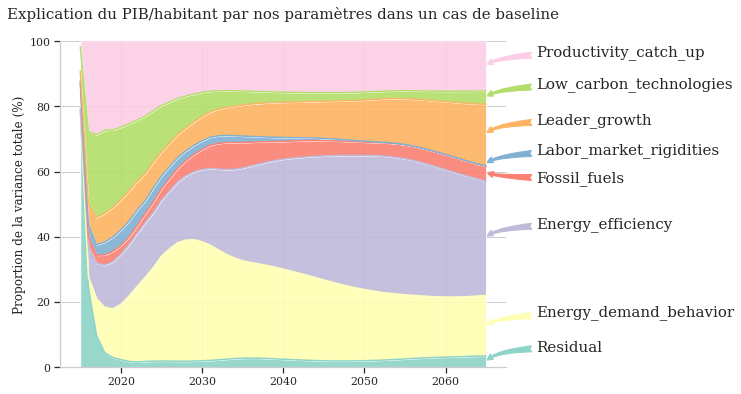

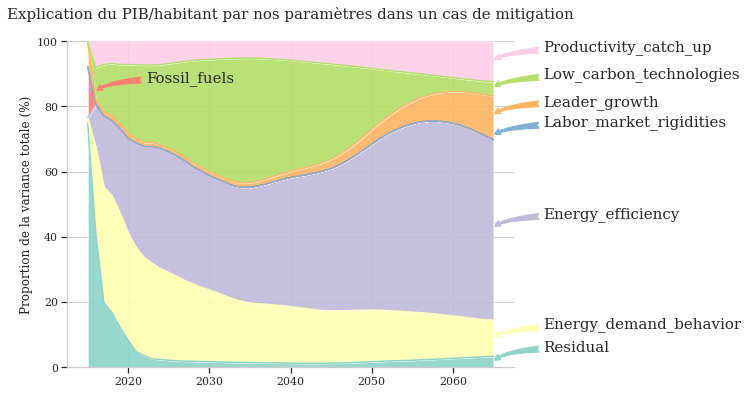

In [23]:
# Décomposition de la variance par ANOVA
# à partir du code d'exemple

## ON SUPPOSERA QUE, POUR TOUTE ANNÉE, LES HHYPOTHÈSES DE L'ANOVA SONT VALIDÉES 
## (indépendance des observations, normalité des résidus, homoscédasticité)
## ET QUE LES FACTEURS ANALYSÉS SONT SIGNIFICATIFS 

import pandas as pd
from pandas import DataFrame,read_csv,concat,notnull
import glob
import statsmodels.api as sm
from statsmodels.stats.anova import anova_lm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
import numpy as np


# Define the range of years
years = list(range(2015, 2066))



# Chargement des données de PIB/habitant pour les scénarios baseline
# Utiliser uniquement les scénarios baseline 
PIB_hab_baseline = data_tp['GDPcap_w'][:216, :]  # Sélection des scénarios baseline
drivers_baseline = drivers[:216, :]  # Paramètres des scénarios baseline

# utiliser uniquement les scénarios de mitigation 
PIB_hab_mit = data_tp['GDPcap_w'][216:, :]  # Sélection des scénarios de mitigation
drivers_mit = drivers[216:, :]  # Paramètres des scénarios de mitigation

# On renomme les paramètres pour les mobiliser dans l'ANOVA
drivers_names_no_space = ["Mitigation", "Leader_growth", "Productivity_catch_up", "Fossil_fuels",
                 "Energy_demand_behavior", "Energy_efficiency", "Low_carbon_technologies",
                 "Labor_market_rigidities"]

# On crée un DataFrame des drivers dont on retire la colonne mitigation 
# qui vaut toujours 0 pour les scénarios baseline

df_drivers = pd.DataFrame(data = drivers_baseline[:,1:], columns = drivers_names_no_space[1:])
df_growth = pd.DataFrame(data = PIB_hab_baseline, columns = ["growth_baseline_drivers" + str(int(year)) for year in years])

df_drivers_mit = pd.DataFrame(data = drivers_mit[:,1:], columns = drivers_names_no_space[1:])
df_growth_mit = pd.DataFrame(data = PIB_hab_mit, columns = ["growth_mit_drivers" + str(int(year)) for year in years])

## Assemblage des dataframes 
growth_baseline_drivers = pd.concat([df_drivers, df_growth], axis=1)
growth_mit_drivers = pd.concat([df_drivers_mit, df_growth_mit], axis=1)


################# CAS BASELINE ############################

## Initialisation
out=DataFrame()
outpc=DataFrame()

# Pour chaque année, on réalise une ANOVA avec Ordinary Least Squares (ols)
# pour expliquer la variance de la croissance du PIB/habitant
# selon nos drivers 
for year in range(2015,2066):
    formula = (
        "growth_baseline_drivers{} ~ Leader_growth + Productivity_catch_up + Fossil_fuels + "
        "Energy_demand_behavior + Energy_efficiency + Low_carbon_technologies + "
        "Labor_market_rigidities" # +"
# et leurs interactions 
        #"Leader_growth:Productivity_catch_up +" 
        #"Leader_growth:Fossil_fuels + "
        #"Energy_efficiency:Energy_demand_behavior +" 
        #"Energy_efficiency:Low_carbon_technologies + "
        # "Energy_efficiency:Leader_growth +" 
        # "Low_carbon_technologies:Labor_market_rigidities"
    ).format(year)
    olsmodel = ols(formula, data=growth_baseline_drivers).fit()
    table=anova_lm(olsmodel)
    table['sum_sq_pc']=100*table['sum_sq']/table['sum_sq'].sum()

    #out=out.append(table['sum_sq'],ignore_index=True)
    #outpc=outpc.append(table['sum_sq_pc'],ignore_index=True)

    # on stocke la variance dans out, et la proportion de la variance expliquée dans outpc
    out=pd.concat( [out,table['sum_sq']],ignore_index=True, axis=1)
    outpc=pd.concat( [outpc,table['sum_sq_pc']],ignore_index=True, axis=1)

out = out.transpose()
outpc = outpc.transpose()

out.index= years
outpc.index= years

## On fixe les paramètres d'afficage des graphiques
font = {'family' : 'serif',
        'weight' : 'normal',
        'size'   : 15}
plt.rc('font', **font)
plt.figure(figsize=(8,6))
ax=plt.subplot(111)

colors = ["#8dd3c7", "#ffffb3", "#bebada", "#fb8072", "#80b1d3", "#fdb462", "#b3de69", "#fccde5", 
          "#d9d9d9", "#bc80bd", "#ccebc5", "#ffed6f", "#ff7f00", "#1f78b4"]

columns = ['Residual', 'Energy_demand_behavior', 'Energy_efficiency',
       'Fossil_fuels', 'Labor_market_rigidities', 'Leader_growth',
       'Low_carbon_technologies', 'Productivity_catch_up']#,
    #  'Leader_growth:Productivity_catch_up',
    #   'Leader_growth:Fossil_fuels',
    #    "Energy_efficiency:Energy_demand_behavior", 
    #    "Energy_efficiency:Low_carbon_technologies",
    #    "Energy_efficiency:Leader_growth", 
    #     'Low_carbon_technologies:Labor_market_rigidities']
legends = columns


prev=0*out['Residual']
i=0
for thecol in columns:
    plt.plot(outpc.index,prev+outpc[thecol],color=colors[i])
    ax.fill_between(outpc.index, prev, prev+outpc[thecol],facecolor=colors[i],alpha=0.9)    
    
    if legends[i] in ['Fossil_fuels']:
        ymean=(prev[2064]+prev[2064]+outpc.loc[2064,thecol])/2
        plt.annotate(legends[i], xy=(2065, ymean),  xycoords='data',
                xytext=(50, -10), textcoords='offset points',
                arrowprops=dict(arrowstyle="fancy",
                        fc=colors[i], ec=colors[i],
                        patchB=None,
                        connectionstyle="angle3,angleA=0,angleB=-60"),
                    )
    else:
        ymean=(prev[2064]+prev[2064]+outpc.loc[2064,thecol])/2
        plt.annotate(legends[i], xy=(2065, ymean),  xycoords='data',
                    xytext=(50, 10), textcoords='offset points',
                    arrowprops=dict(arrowstyle="fancy",
                                    fc=colors[i], ec=colors[i],
                                    patchB=None,
                                    connectionstyle="angle3,angleA=0,angleB=60"),
                        )
        
    prev+=outpc[thecol]
    i+=1

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(True)
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
#ax.set_yticklabels([])
ax.set_ylim([0,100])
plt.ylabel("Proportion de la variance totale (%)")
plt.title("Explication du PIB/habitant par nos paramètres dans un cas de baseline", y = 1.05, fontsize=15)
plt.show()


################# CAS MITIGATION ############################

## Initialisation
out_mit=DataFrame()
outpc_mit=DataFrame()

# Pour chaque année, on réalise une ANOVA avec Ordinary Least Squares (ols)
# pour expliquer la variance de la croissance du PIB/habitant
# selon nos drivers 
for year in range(2015,2066):
    formula_mit = (
        "growth_mit_drivers{} ~ Leader_growth + Productivity_catch_up + Fossil_fuels + "
        "Energy_demand_behavior + Energy_efficiency + Low_carbon_technologies + "
        "Labor_market_rigidities" # +"
# et leurs interactions 
        #"Leader_growth:Productivity_catch_up +" 
        #"Leader_growth:Fossil_fuels + "
        #"Energy_efficiency:Energy_demand_behavior +" 
        #"Energy_efficiency:Low_carbon_technologies + "
        # "Energy_efficiency:Leader_growth +" 
        # "Low_carbon_technologies:Labor_market_rigidities"
    ).format(year)
    olsmodel_mit = ols(formula_mit, data=growth_mit_drivers).fit()
    table_mit=anova_lm(olsmodel_mit)
    table_mit['sum_sq_pc']=100*table_mit['sum_sq']/table_mit['sum_sq'].sum()

    #out=out.append(table['sum_sq'],ignore_index=True)
    #outpc=outpc.append(table['sum_sq_pc'],ignore_index=True)

    # on stocke la variance dans out, et la proportion de la variance expliquée dans outpc
    out_mit=pd.concat( [out_mit,table_mit['sum_sq']],ignore_index=True, axis=1)
    outpc_mit=pd.concat( [outpc_mit,table_mit['sum_sq_pc']],ignore_index=True, axis=1)

out_mit = out_mit.transpose()
outpc_mit = outpc_mit.transpose()

out_mit.index= years
outpc_mit.index= years

## On fixe les paramètres d'afficage des graphiques
font = {'family' : 'serif',
        'weight' : 'normal',
        'size'   : 15}
plt.rc('font', **font)
plt.figure(figsize=(8,6))
ax=plt.subplot(111)

colors = ["#8dd3c7", "#ffffb3", "#bebada", "#fb8072", "#80b1d3", "#fdb462", "#b3de69", "#fccde5", 
          "#d9d9d9", "#bc80bd", "#ccebc5", "#ffed6f", "#ff7f00", "#1f78b4"]

columns = ['Residual', 'Energy_demand_behavior', 'Energy_efficiency',
       'Fossil_fuels', 'Labor_market_rigidities', 'Leader_growth',
       'Low_carbon_technologies', 'Productivity_catch_up']#,
    #  'Leader_growth:Productivity_catch_up',
    #   'Leader_growth:Fossil_fuels',
    #    "Energy_efficiency:Energy_demand_behavior", 
    #    "Energy_efficiency:Low_carbon_technologies",
    #    "Energy_efficiency:Leader_growth", 
    #     'Low_carbon_technologies:Labor_market_rigidities']
legends = columns


prev_mit=0*out_mit['Residual']
i=0
for thecol in columns:
    plt.plot(outpc_mit.index,prev_mit+outpc_mit[thecol],color=colors[i])
    ax.fill_between(outpc_mit.index, prev_mit, prev_mit+outpc_mit[thecol],facecolor=colors[i],alpha=0.9)    
    
    if legends[i] in ['Fossil_fuels']:
        ymean=(prev_mit[2015]+prev_mit[2015]+outpc_mit.loc[2015,thecol])/2
        plt.annotate(legends[i], xy=(2016, ymean),  xycoords='data',
                xytext=(50, 10), textcoords='offset points',
                arrowprops=dict(arrowstyle="fancy",
                        fc=colors[i], ec=colors[i],
                        patchB=None,
                        connectionstyle="angle3,angleA=0,angleB=60"),
                    )
    else:
        ymean=(prev_mit[2064]+prev_mit[2064]+outpc_mit.loc[2064,thecol])/2
        plt.annotate(legends[i], xy=(2065, ymean),  xycoords='data',
                    xytext=(50, 10), textcoords='offset points',
                    arrowprops=dict(arrowstyle="fancy",
                                    fc=colors[i], ec=colors[i],
                                    patchB=None,
                                    connectionstyle="angle3,angleA=0,angleB=60"),
                        )
        
    prev_mit+=outpc_mit[thecol]
    i+=1

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(True)
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
#ax.set_yticklabels([])
ax.set_ylim([0,100])
plt.ylabel("Proportion de la variance totale (%)")
plt.title("Explication du PIB/habitant par nos paramètres dans un cas de mitigation", y = 1.05, fontsize=15)
plt.show()